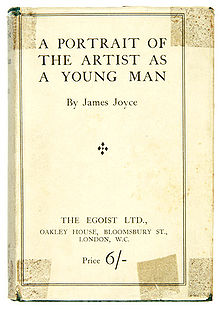

Resources:  
https://www.guru99.com/tokenize-words-sentences-nltk.html  
https://stackoverflow.com/questions/4576077/how-can-i-split-a-text-into-sentences  
https://chardet.readthedocs.io/en/latest/usage.html#basic-usage  
https://spacy.io/models/en#en_core_web_sm  
https://stackoverflow.com/questions/51490620/extracting-names-from-a-text-file-using-spacy  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html  
https://www.youtube.com/watch?v=KOCnVyxVks8&ab_channel=KGPTalkie  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rank.html  

In [62]:
import chardet
import re
import spacy
import pandas as pd
import spacy
from spacy.lang.en.examples import sentences 
from pathlib import Path
from nltk.tokenize import sent_tokenize

# Option to show all the DataFrame columns/rows
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)
# Ignore competability warnings
import warnings
warnings.filterwarnings('ignore')

### Transforamtion and Standardization  
**Q1**: Отвори текстовия файл и извлечи съдържанието му в подходящ формат, разделяйки го на изречения.  
**Q2**: Валидирай UTF-8 енкодинга и изчисти/замести всякакви невалидни символи в текста.  

In [63]:
# -*- coding: utf-8 -*-
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

In [64]:
# Check the encoding type
filedata = open("a_portrait_new.txt", "rb")
text_check = filedata.read()
print(chardet.detect(text_check))
filedata.close()

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [65]:
# Read as UTF-8
filedata = open("a_portrait_new.txt", encoding='UTF-8')
text = filedata.read()
filedata.close()

In [66]:
text = text.replace('\n', ' ')
text = text.replace('  ', ' ')
text = text.replace('--', '')
text = text.replace('* * * * *', '')

In [67]:
# Tokenization
text = sent_tokenize(text)

In [68]:
text

['A Portrait of the Artist as a Young Man  by James Joyce   Chapter 1  Once upon a time and a very good time it was there was a moocow coming down along the road and this moocow that was coming down along the road met a nicens little boy named baby tuckoo... His father told him that story: his father looked at him through a glass: he had a hairy face.',
 'He was baby tuckoo.',
 'The moocow came down the road where Betty Byrne lived: she sold lemon platt.',
 'O, the wild rose blossoms   On the little green place.',
 'He sang that song.',
 'That was his song.',
 'O, the green wothe botheth.',
 'When you wet the bed first it is warm then it gets cold.',
 'His mother put on the oilsheet.',
 'That had the queer smell.',
 'His mother had a nicer smell than his father.',
 'She played on the piano the sailor’s hornpipe for him to dance.',
 'He danced:   Tralala lala,   Tralala tralaladdy,   Tralala lala,   Tralala lala.',
 'Uncle Charles and Dante clapped.',
 'They were older than his father a

In [69]:
# Check for special characters in text and append their index to a list
def run(text):
    list_invalid_sentences = []
    regex = re.compile('[@_#$%^&*<>/\|}{~]') 
    for sentence in text:    
        if(regex.search(sentence) != None):
#             print(str(text.index(sentence)))
            list_invalid_sentences.append(text.index(sentence))          
            
    return list_invalid_sentences        

In [70]:
list_invalid_indexes = run(text)
print(list_invalid_indexes)

[]


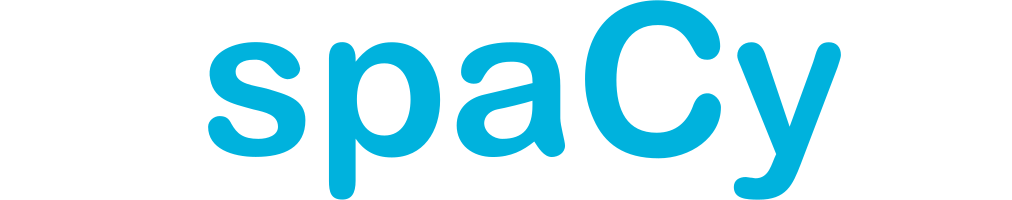

**Q3:** Филтрирай само имената на хора (герои) извадени с NER модела, идентифицирай и стандартизирай всякакви частични   съкратени споменавания към пълната форма в която се срещат.  
**Q4:** Филтрирай само имената на хора (герои) извадени с NER модела, идентифицирай и стандартизирай всякакви частични съкратениспоменавания към пълната форма в която се срещат.   
**Q5:** В колко и кои изречения се с среща всяко едно име на герой? 

In [71]:
# Load the NLP model from spaCy
nlp = spacy.load("en_core_web_sm")

In [72]:
# test available data
first_sentense = nlp(text[1])
for token in first_sentense:
    print(token.text, token.pos_, token.tag_, token.dep_)

He PRON PRP nsubj
was AUX VBD ROOT
baby NOUN NN attr
tuckoo NOUN NN advmod
. PUNCT . punct


In [73]:
# test person recognition
first_sentense = nlp(text[2])
for token in first_sentense.ents:
    print(token.text, token.label_)

Betty Byrne PERSON


In [12]:
# Add without a DataFrame structure
person_list = []
for sentense in text:
    doc = nlp(sentense)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            person_list.append(ent)

In [13]:
len(person_list)

614

In [74]:
df_persons = pd.DataFrame(columns=['name','sentence_num'])
df_persons

,name,sentence_num


In [75]:
# Add WITH a DataFrame structure
person_list = []
for sentence in text:
    doc = nlp(sentence)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            df_persons = df_persons.append({'name': str(ent),
                                            'sentence_num': text.index(sentence)}, ignore_index = True)
            person_list.append(ent)

In [76]:
df_persons['sentence_num'] = df_persons['sentence_num'].astype(int)
df_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          614 non-null    object
 1   sentence_num  614 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 7.3+ KB


In [77]:
print(df_persons['name'].value_counts())

Dante                             48
Casey                             35
Arnall                            26
Dixon                             21
Charles                           20
Davin                             19
Michael                           18
Mrs Dedalus                       15
John                              12
Moynihan                          11
Athy                              11
Uncle Charles                     10
Nasty Roche                        9
Simon Moonan                       9
Stevie                             9
Glynn                              8
Simon                              8
Francis Xavier                     8
Cecil Thunder                      7
Mrs Riordan                        7
Dedalus                            7
Stephen Dedalus                    6
Jack Lawton                        6
Dolan                              6
Eileen                             6
Wallis                             5
Goggins                            5
M

In [78]:
df_persons['name'].unique()

array(['James Joyce', 'Betty Byrne', 'Tralala', 'Uncle Charles', 'Dante',
       'Charles', 'Michael Davitt', 'Eileen', 'Rody Kickham',
       'Nasty Roche', 'Stephen Dedalus', 'Jack Lawton’s',
       'Hamilton Rowan', 'Wolsey', 'Arnall', 'Simon Moonan',
       'Jack Lawton', 'Jimmy Magee', 'Tullabeg', 'Wells', 'Universe',
       'Casey', 'Leicester Abbey', 'Michael', 'Little', 'Brigid',
       'Dingdong', 'Athy', 'Dedalus', 'Queen Victoria', 'John',
       'Mrs Riordan', 'Christopher', 'Christy', 'jack', 'Mrs Dedalus',
       'Ally Daly', 'Simon', 'Billy', 'Armagh', 'Dante hotlythe language',
       'Tullamore', 'MARY AND JOSEPH!', 'Kitty O’Shea', 'Godforsaken',
       'Bishop Lanigan', 'Cecil Thunder', 'Barrett', 'Corrigan',
       'Gleeson', 'Lady Boyle', 'Kneel', 'Paddy Barrett', 'Tom Furlong’s',
       'Peter Parley’s', 'Peter Parley', 'Ignatius Loyola',
       'Francis Xavier', 'Lorenzo Ricci', 'Stanislaus Kostka',
       'Aloysius Gonzago', 'Blessed John Berchmans', 'Peter Kenny

In [79]:
names_to_drop = ['Tralala', 'Universe', 'Dingdong', 'Dante hotlythe language','Tullamore', 'MARY AND JOSEPH!',
                 'Godforsaken', 'Munster', 'Annoyed', 'The Blessed Sacrament', 'EARTHLY BEAUTY', 'DANGEROUS',
                 'Lucifer', 'God Himself', 'Merciful Redeemer', 'Saint Catherine', 'Saint Thomas', 'POENA DAMNI',
                 'Him', 'Saviour', 'Longer', 'Divine Perfections', 'Meek', 'the Blessed Sacrament', 'Sour',
                 'Becauseboro', 'VISA PLACENT', 'QUIA FACIES VOSTRA MONSTRAT UT', 'HUMORE ESTIS', 'Rhythm',
                 'INTEGRITAS', 'COMIC', 'THAT IMAGE', 'Depart', 'Began', 'VIA Holyhead']

In [80]:
# Drop unexpected names
df_sliced = df_persons[~df_persons['name'].isin(names_to_drop)]
df_sliced.shape

(567, 2)

In [81]:
# Trim whitespace from ends of each value across all series in dataframe
def trim_all_columns(df):
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

In [82]:
df_trimed = trim_all_columns(df_sliced)
df_trimed.shape

(567, 2)

In [83]:
df_trimed.replace('\’s', '', regex=True, inplace=True)

In [84]:
print(df_trimed['name'].value_counts())

Dante                         48
Casey                         35
Arnall                        26
Dixon                         21
Charles                       20
Davin                         19
Michael                       18
Mrs Dedalus                   15
John                          12
Moynihan                      11
Athy                          11
Uncle Charles                 10
Nasty Roche                    9
Simon Moonan                   9
Stevie                         9
Simon                          8
Francis Xavier                 8
Glynn                          8
Mrs Riordan                    7
Cecil Thunder                  7
Dedalus                        7
Jack Lawton                    7
Stephen Dedalus                6
Eileen                         6
Dolan                          6
Corrigan                       5
Wallis                         5
Donovan                        5
Goggins                        5
Mike Flynn                     5
Wells     

In [85]:
print(df_trimed.sort_values('name'))

                           name  sentence_num
359                      Afraid          1777
357             Alec Kafoozelum          1761
109                   Ally Daly           607
590            Aloysius Gonzaga          4986
281            Aloysius Gonzago          1291
429           Alphonsus Liguori          3100
319           Anthony MacSwiney          1523
520                   Aristotle          4083
457                   Aristotle          3495
149                      Armagh           715
243                      Arnall          1078
28                       Arnall            91
256                      Arnall          1120
258                      Arnall          1158
259                      Arnall          1159
261                      Arnall          1206
263                      Arnall          1216
264                      Arnall          1217
37                       Arnall           117
38                       Arnall           123
399                      Arnall   

In [86]:
df_trimed.replace('Mrs', '', regex=True, inplace=True)
df_trimed = trim_all_columns(df_trimed)

In [87]:
print(df_trimed['name'].value_counts())

Dante                         48
Casey                         35
Arnall                        26
Dedalus                       22
Dixon                         21
Charles                       20
Davin                         19
Michael                       18
John                          12
Athy                          11
Moynihan                      11
Uncle Charles                 10
Simon Moonan                   9
Stevie                         9
Nasty Roche                    9
Francis Xavier                 8
Simon                          8
Glynn                          8
Jack Lawton                    7
Cecil Thunder                  7
Riordan                        7
Stephen Dedalus                6
Eileen                         6
Dolan                          6
Donovan                        5
Mike Flynn                     5
Wallis                         5
Corrigan                       5
Goggins                        5
Maurice                        4
Wells     

In [88]:
df_trimed.replace('Aloysius Gonzaga', 'Aloysius Gonzago', regex=True, inplace=True)
df_trimed.replace('Uncle Charles', 'Charles', regex=True, inplace=True)

In [89]:
# See which name are appearing toghether in sentences
df_trimed.sort_values('sentence_num')

,name,sentence_num
0,James Joyce,0
1,Betty Byrne,2
5,Charles,13
6,Dante,13
7,Charles,14
8,Dante,14
9,Dante,15
10,Michael Davitt,16
11,Dante,17
12,Eileen,21


### Rank/Clusters & Methods for API
**Q6:** Заедно с кои други герои се споменава в едно и също изречение всеки даден герой и колко пъти?  
**Q7:** Съхрани в подходяща структура от данни информация за споменаванията на героите в изреченията от романа.  
**Q8:** Използвайки тази структура, можеш ли да откроиш даден герой като главен, второстепенен или епизодичен на база на извлечената информация?

In [90]:
value_counts = df_trimed['name'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['name', 'counts']
df_value_counts_reset

,name,counts
0,Dante,48
1,Casey,35
2,Charles,30
3,Arnall,26
4,Dedalus,22
5,Dixon,21
6,Davin,19
7,Michael,18
8,John,12
9,Athy,11


In [91]:
# Posible to use also rank - method-max
df_value_counts_reset['rank'] = df_value_counts_reset["counts"].rank(method='max', ascending=False)
df_value_counts_reset

,name,counts,rank
0,Dante,48,1.0
1,Casey,35,2.0
2,Charles,30,3.0
3,Arnall,26,4.0
4,Dedalus,22,5.0
5,Dixon,21,6.0
6,Davin,19,7.0
7,Michael,18,8.0
8,John,12,9.0
9,Athy,11,11.0


In [94]:
import sklearn
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(df_value_counts_reset.iloc[:,1:])
df_value_counts_reset["rank"] = clusters

In [95]:
df_value_counts_reset

,name,counts,rank
0,Dante,48,1
1,Casey,35,1
2,Charles,30,1
3,Arnall,26,1
4,Dedalus,22,1
5,Dixon,21,1
6,Davin,19,1
7,Michael,18,1
8,John,12,2
9,Athy,11,2


## API - Methods

### rank & mentions count

In [197]:
df_value_counts_reset.loc[df_value_counts_reset['name'] == 'Simon Moonan', 'rank']

11    2
Name: rank, dtype: int32

In [182]:
list(df_value_counts_reset.loc[df_value_counts_reset['name'] == 'Eileen', 'rank'])[0]

2

In [183]:
list(df_value_counts_reset.loc[df_value_counts_reset['name'] == 'Dante', 'counts'])[0]

48

In [97]:
df_value_counts_reset.to_csv('rank_mentions_count.csv')

### mono_mentions_count

In [105]:
# Names - No two names in one sentence
df_trimed.sort_values('sentence_num')

,name,sentence_num
0,James Joyce,0
1,Betty Byrne,2
5,Charles,13
6,Dante,13
7,Charles,14
8,Dante,14
9,Dante,15
10,Michael Davitt,16
11,Dante,17
12,Eileen,21


In [99]:
df_one_name = df_trimed.drop_duplicates(subset=['sentence_num'], keep=False).sort_values('sentence_num')
df_one_name.shape

(412, 2)

In [100]:
df_one_name.head(10)

,name,sentence_num
0,James Joyce,0
1,Betty Byrne,2
9,Dante,15
10,Michael Davitt,16
11,Dante,17
12,Eileen,21
13,Dante,24
14,Rody Kickham,32
17,Rody Kickham,34
18,Nasty Roche,35


In [101]:
count_name = df_one_name['name'].value_counts()
df_count_name = pd.DataFrame(count_name)
df_count_name = df_count_name.reset_index()
df_count_name.columns = ['name', 'counts']
df_count_name

,name,counts
0,Dante,35
1,Casey,25
2,Arnall,22
3,Dixon,20
4,Charles,20
5,Davin,14
6,Michael,14
7,Dedalus,13
8,Moynihan,9
9,John,9


In [200]:
df_count_name.loc[df_count_name['name'] == 'Clontail Chapel', 'counts']

Series([], Name: counts, dtype: int64)

In [103]:
df_count_name.to_csv('mono_mentions_count.csv')

### co-mentions count

In [106]:
df_co_ment = df_trimed.copy()
df_co_ment.shape

(567, 2)

In [107]:
df_co_ment.sort_values('sentence_num')

,name,sentence_num
0,James Joyce,0
1,Betty Byrne,2
5,Charles,13
6,Dante,13
7,Charles,14
8,Dante,14
9,Dante,15
10,Michael Davitt,16
11,Dante,17
12,Eileen,21


In [110]:
mask = df_co_ment.duplicated(subset=['sentence_num'], keep=False)

pandas.core.series.Series

In [116]:
mask

0      False
1      False
5       True
6       True
7       True
8       True
9      False
10     False
11     False
12     False
13     False
14     False
15      True
16      True
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28      True
29      True
30      True
31      True
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39      True
40      True
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52      True
54      True
55     False
56      True
57      True
58      True
59      True
60      True
61     False
62     False
63     False
64     False
65     False
66      True
67      True
68     False
69     False
70     False
71     False
72     False
73     False
74     False
76     False
77     False
78      True
79      True
80      True
81      True

In [111]:
df_co_ment = df_co_ment[mask]
df_co_ment

,name,sentence_num
5,Charles,13
6,Dante,13
7,Charles,14
8,Dante,14
15,Rody Kickham,33
16,Nasty Roche,33
28,Arnall,91
29,Dante,91
30,Charles,91
31,Dante,91


In [118]:
# We need second mask because the some names are mentioned twice in one sentence
mask_dup = df_co_ment.duplicated(subset=['name', 'sentence_num'])

In [119]:
df_co_ment = df_co_ment[~mask_dup]

In [120]:
df_co_ment

,name,sentence_num
5,Charles,13
6,Dante,13
7,Charles,14
8,Dante,14
15,Rody Kickham,33
16,Nasty Roche,33
28,Arnall,91
29,Dante,91
30,Charles,91
39,Jack Lawton,124


In [123]:
count_co_men = df_co_ment['name'].value_counts()
df_count_co = pd.DataFrame(count_co_men)
df_count_co = df_count_co.reset_index()
df_count_co.columns = ['name', 'counts']
df_count_co

,name,counts
0,Dante,11
1,Charles,9
2,Casey,9
3,Dedalus,9
4,Athy,6
5,Arnall,4
6,Davin,4
7,Riordan,4
8,Corrigan,3
9,Michael,2


In [193]:
df_count_co.loc[df_count_co['name'] == 'Dante', 'counts']

0    11
Name: counts, dtype: int64

In [125]:
df_count_co.to_csv('co_mention_count.csv')

### co_mention_names

In [126]:
co_ment_names = df_co_ment.copy()

In [186]:
co_ment_names.to_csv('co_mentions_names.csv')

In [127]:
co_ment_names

,name,sentence_num
5,Charles,13
6,Dante,13
7,Charles,14
8,Dante,14
15,Rody Kickham,33
16,Nasty Roche,33
28,Arnall,91
29,Dante,91
30,Charles,91
39,Jack Lawton,124


In [130]:
gk = co_ment_names.groupby('name')
gk.get_group('Dante')

,name,sentence_num
6,Dante,13
8,Dante,14
29,Dante,91
56,Dante,236
59,Dante,291
88,Dante,563
97,Dante,576
134,Dante,666
146,Dante,696
158,Dante,744


In [129]:
# gk = co_ment_names.groupby('name')
# gk.get_group('Dante').sentence_num.values 

array([ 13,  14,  91, 236, 291, 563, 576, 666, 696, 744, 861], dtype=int64)

In [132]:
gk_sen = co_ment_names.groupby('sentence_num')
gk_sen.get_group(13).name.values 

array(['Charles', 'Dante'], dtype=object)

In [134]:
name = 'Dante' # This name will be provided by the API
list_sen = []
for index, row in co_ment_names.iterrows():
    if row['name'] == name:
        print(row['sentence_num'])
        list_sen.append(row['sentence_num'])
#     print(row['name'], row['sentence_num'])

13
14
91
236
291
563
576
666
696
744
861


In [135]:
list_sen

[13, 14, 91, 236, 291, 563, 576, 666, 696, 744, 861]

In [140]:
names_list = []
for i in list_sen:
    print(gk_sen.get_group(i).name.values)
    names_list.append(list(gk_sen.get_group(i).name.values))

['Charles' 'Dante']
['Charles' 'Dante']
['Arnall' 'Dante' 'Charles']
['Dante' 'Casey' 'Charles']
['Dante' 'Charles']
['Charles' 'Dante' 'Casey']
['Dante' 'Riordan']
['Dante' 'Dedalus']
['Dedalus' 'Dante']
['Dedalus' 'Dante']
['Dante' 'Casey']


In [145]:
clean_list = []
for sen_list in names_list:
    for i in sen_list:
        if i != name:
            clean_list.append(i)

In [146]:
clean_list

['Charles',
 'Charles',
 'Arnall',
 'Charles',
 'Casey',
 'Charles',
 'Charles',
 'Charles',
 'Casey',
 'Riordan',
 'Dedalus',
 'Dedalus',
 'Dedalus',
 'Casey']

In [188]:
list_n = set(clean_list)

{'Arnall', 'Casey', 'Charles', 'Dedalus', 'Riordan'}

### getMainCharacters & getSupportCharacters & getEpisodeCharacters

In [149]:
df_main_characters = df_value_counts_reset.copy()
df_main_characters

,name,counts,rank
0,Dante,48,1
1,Casey,35,1
2,Charles,30,1
3,Arnall,26,1
4,Dedalus,22,1
5,Dixon,21,1
6,Davin,19,1
7,Michael,18,1
8,John,12,2
9,Athy,11,2


In [151]:
df_main_characters = df_main_characters.loc[df_main_characters['rank'] == 1]
df_main_characters.name.values

array(['Dante', 'Casey', 'Charles', 'Arnall', 'Dedalus', 'Dixon', 'Davin',
       'Michael'], dtype=object)

In [152]:
list(df_main_characters.name.values)

['Dante', 'Casey', 'Charles', 'Arnall', 'Dedalus', 'Dixon', 'Davin', 'Michael']

In [153]:
# Use the getCharactersInfo to apply each of the rank 1 characters

In [155]:
# TOP 10 Secondary Characters
df_second_char = df_value_counts_reset.copy()
df_second_char = df_second_char.loc[df_second_char['rank'] == 2]
df_second_char = df_second_char.head(10)
df_second_char

,name,counts,rank
8,John,12,2
9,Athy,11,2
10,Moynihan,11,2
11,Simon Moonan,9,2
12,Stevie,9,2
13,Nasty Roche,9,2
14,Glynn,8,2
15,Francis Xavier,8,2
16,Simon,8,2
17,Riordan,7,2


In [189]:
list(df_second_char.name.values)

['John',
 'Athy',
 'Moynihan',
 'Simon Moonan',
 'Stevie',
 'Nasty Roche',
 'Glynn',
 'Francis Xavier',
 'Simon',
 'Riordan']

In [157]:
# Random 10 Rank 3 Characters
df_rank3_char = df_value_counts_reset.copy()
df_rank3_char = df_rank3_char.loc[df_rank3_char['rank'] == 0]
df_rank3_char

,name,counts,rank
31,Peter Parley,3,0
32,Tennyson,3,0
33,Josephine,3,0
34,Doyle,3,0
35,Byron,2,0
36,Ben Jonson,2,0
37,Vincent Heron,2,0
38,Moran,2,0
39,Cardinal Newman,2,0
40,Johnny Cashman,2,0


In [204]:
df_rank3_char = df_rank3_char.reset_index(drop=True)
df_rank3_char

,name,counts,rank
0,Peter Parley,3,0
1,Tennyson,3,0
2,Josephine,3,0
3,Doyle,3,0
4,Byron,2,0
5,Ben Jonson,2,0
6,Vincent Heron,2,0
7,Moran,2,0
8,Cardinal Newman,2,0
9,Johnny Cashman,2,0


In [205]:
df_rank3_char.iloc[[63]]


,name,counts,rank
63,Clontail Chapel,1,0


In [192]:
df_ten_elements = df_rank3_char.sample(n=10)
df_ten_elements

,name,counts,rank
108,Anthony MacSwiney,1,0
169,Peter Kenny,1,0
129,James,1,0
55,Stephen,2,0
106,James Joyce,1,0
32,Tennyson,3,0
86,Tullabeg,1,0
172,Guido Cavalcanti,1,0
170,John Duncan,1,0
132,Thoth,1,0


In [198]:
list(df_ten_elements.name.values)

['Anthony MacSwiney',
 'Peter Kenny',
 'James',
 'Stephen',
 'James Joyce',
 'Tennyson',
 'Tullabeg',
 'Guido Cavalcanti',
 'John Duncan',
 'Thoth']

### getCharacterMenitons

In [161]:
df_mentions = df_trimed.copy()

In [206]:
df_mentions

,name,sentence_num
0,James Joyce,0
1,Betty Byrne,2
5,Charles,13
6,Dante,13
7,Charles,14
8,Dante,14
9,Dante,15
10,Michael Davitt,16
11,Dante,17
12,Eileen,21


In [163]:
name = 'Dante' # This name will be provided by the API
list_sen_num = []
for index, row in df_mentions.iterrows():
    if row['name'] == name:
        print(row['sentence_num'])
        list_sen_num.append(row['sentence_num'])

13
14
15
17
24
87
89
91
91
92
233
236
291
559
563
576
577
621
638
641
644
649
659
661
663
666
676
696
711
719
737
744
744
750
752
756
767
817
825
839
846
861
867
874
882
885
887
1986


In [164]:
# For main characters loop through the rank 1! - Implement in Flask

### getCharactersCoMenitons

In [166]:
# We get this df from csv(co_mentions_names.csv) in the API
co_ment_two_names = co_ment_names.copy()
co_ment_two_names

,name,sentence_num
5,Charles,13
6,Dante,13
7,Charles,14
8,Dante,14
15,Rody Kickham,33
16,Nasty Roche,33
28,Arnall,91
29,Dante,91
30,Charles,91
39,Jack Lawton,124


In [171]:
name_one = 'Dante' # This name will be provided by the API
list_sen_one = []
for index, row in co_ment_two_names.iterrows():
    if row['name'] == name:
        print(row['sentence_num'])
        list_sen_one.append(row['sentence_num'])

13
14
91
236
291
563
576
666
696
744
861


In [172]:
name_two = 'Charles' # This name will be provided by the API
list_sen_two = []
for index, row in co_ment_two_names.iterrows():
    if row['name'] == name_two:
        print(row['sentence_num'])
        list_sen_two.append(row['sentence_num'])

13
14
91
236
291
563
672
695
883


In [173]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2))

print(intersection(list_sen_one, list_sen_two))

[291, 236, 13, 14, 563, 91]


In [174]:
text[291]

'God bless Dante and Uncle Charles and spare them to me!'

In [175]:
text[563]

'All were waiting: uncle Charles, who sat far away in the shadow of the window, Dante and Mr Casey, who sat in the easy-chairs at either side of the hearth, Stephen, seated on a chair between them, his feet resting on the toasted boss.'